# Data Exploration

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student_habits_performance.csv")

In [99]:
print(df.head())
print(df.info())
print(df.describe())

print(df.isnull().sum())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

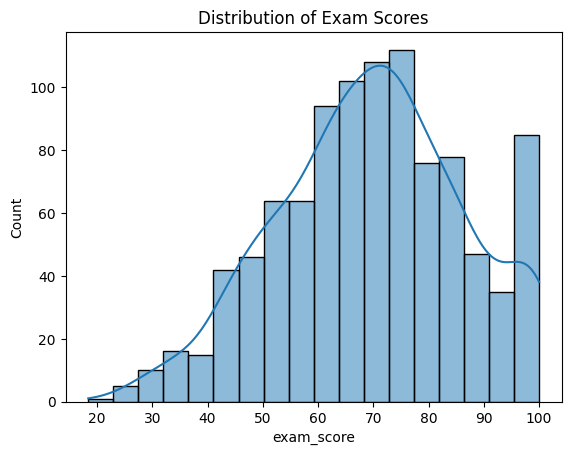

In [100]:
sns.histplot(df['exam_score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

# Preprocessing

In [101]:
df = df.drop('student_id', axis=1)

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['part_time_job'] = df['part_time_job'].map({'No': 0, 'Yes': 1})
df['extracurricular_participation'] = df['extracurricular_participation'].map({'No': 0, 'Yes': 1})

df = pd.get_dummies(df, columns=['diet_quality', 'parental_education_level', 'internet_quality'], dtype=int)


df = df.fillna(df.mean())


In [102]:
Y = df['exam_score']
X = df.drop('exam_score', axis=1)

In [103]:
print("Number of missing values in X:", X.isnull().sum().sum())
print("Number of missing values in y:", Y.isnull().sum())

Number of missing values in X: 0
Number of missing values in y: 0


In [104]:
print(df)

     age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0     23     1.0                  0.0                 1.2            1.1   
1     20     1.0                  6.9                 2.8            2.3   
2     21     0.0                  1.4                 3.1            1.3   
3     23     1.0                  1.0                 3.9            1.0   
4     19     1.0                  5.0                 4.4            0.5   
..   ...     ...                  ...                 ...            ...   
995   21     1.0                  2.6                 0.5            1.6   
996   17     1.0                  2.9                 1.0            2.4   
997   20     0.0                  3.0                 2.6            1.3   
998   24     0.0                  5.4                 4.1            1.1   
999   19     1.0                  4.3                 2.9            1.9   

     part_time_job  attendance_percentage  sleep_hours  exercise_frequency  \
0        

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Training Model

## Linear Regression

In [107]:
X

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,extracurricular_participation,diet_quality_Fair,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor
0,23,1.0,0.0,1.2,1.1,0,85.0,8.0,6,8,1,1,0,0,0,0,1,1,0,0
1,20,1.0,6.9,2.8,2.3,0,97.3,4.6,6,8,0,0,1,0,0,1,0,1,0,0
2,21,0.0,1.4,3.1,1.3,0,94.8,8.0,1,1,0,0,0,1,0,1,0,0,0,1
3,23,1.0,1.0,3.9,1.0,0,71.0,9.2,4,1,1,0,0,1,0,0,1,0,1,0
4,19,1.0,5.0,4.4,0.5,0,90.9,4.9,3,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,1.0,2.6,0.5,1.6,0,77.0,7.5,2,6,1,1,0,0,0,1,0,0,1,0
996,17,1.0,2.9,1.0,2.4,1,86.0,6.8,1,6,1,0,0,1,0,1,0,1,0,0
997,20,0.0,3.0,2.6,1.3,0,61.9,6.5,5,9,1,0,1,0,1,0,0,0,1,0
998,24,0.0,5.4,4.1,1.1,1,100.0,7.6,0,1,0,1,0,0,1,0,0,1,0,0


In [108]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

# Evaluating Model

## Linear Regression

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)


In [111]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 4.19
Root Mean Squared Error (RMSE): 5.15
R-squared (R²): 0.90


## Random Forest Regressor

In [112]:
Y_rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, Y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(Y_test, Y_rf_pred)
rf_r2 = r2_score(Y_test, Y_rf_pred)

In [113]:
print("Random Forest Regressor Performance:")
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²: {rf_r2:.2f}")

Random Forest Regressor Performance:
MAE: 4.99
RMSE: 6.24
R²: 0.85


## Model Comparison

In [114]:
model_results = []

model_results.append({
    'Mode Name': 'Linear Regression',
    'MAE': mae,
    'RMSE': rmse,
    'R2': r2
})

model_results.append({
    'Mode Name': 'Random Forest Regressor',
    'MAE': rf_mae,
    'RMSE': rf_rmse,
    'R2': rf_r2
})

results_df = pd.DataFrame(model_results)

print(results_df)

                 Mode Name       MAE      RMSE        R2
0        Linear Regression  4.186965  5.147316  0.896678
1  Random Forest Regressor  4.988220  6.236916  0.848305


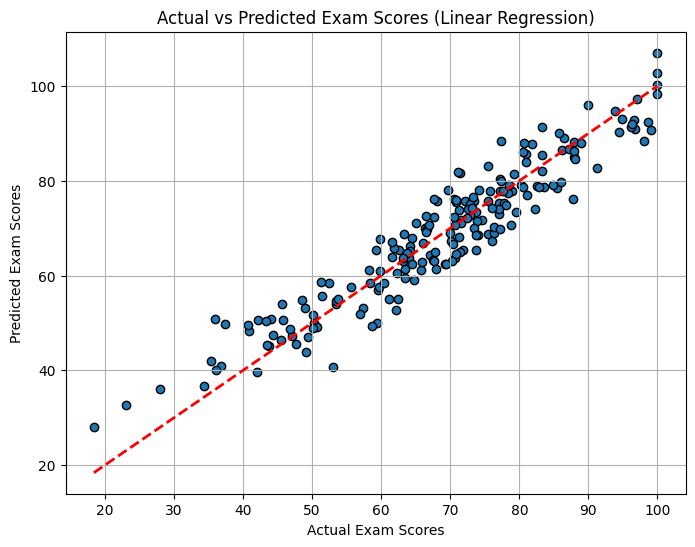

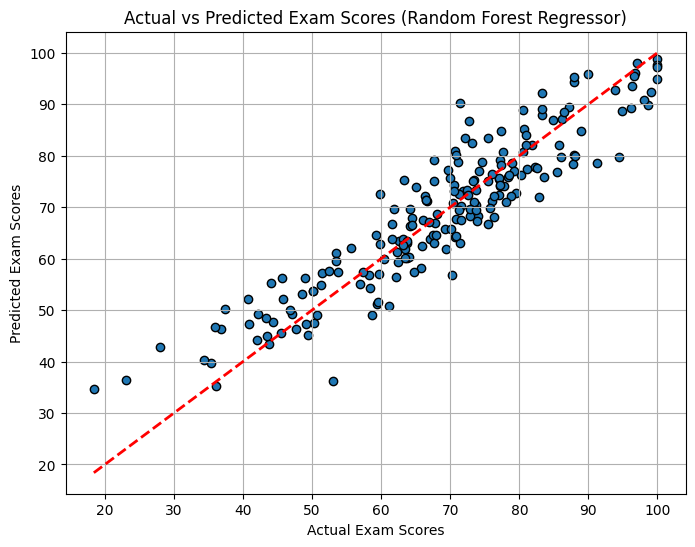

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Linear Regression)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_rf_pred, edgecolors=(0, 0, 0))
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Random Forest Regressor)')
plt.grid(True)
plt.show()

# Saving Models

In [116]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')

joblib.dump(rf_model, 'random_forest_regressor_model.pkl')

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']